# Week 07 Handson - Association Rule
In this hands-on session, we will try to uncover the association rule from given transaction items. Association rule mining is a technique to identify underlying relations between different items. We will cover:
1. data preprocessing for association rule,
2. implement algorithm for association rule,
3. find interesting association rule from dataset

## Read dataset "dataset_association_rule.dat"

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('dataset_association_rule.dat', header=None)
df.head()

,0
0,36 69 115 226 278 343 345 358 368 370 401 450 ...
1,8 51 55 73 78 117 140 175 187 229 266 295 304 ...
2,53 55 98 159 192 322 332 402 412 413 424 430 4...
3,48 203 205 227 279 294 320 335 359 414 509 525...
4,58 69 73 82 120 146 166 178 217 220 244 256 33...


## Milestone 01 (M01)
Based on the dataset given to you, perform data pre-processing so that the data become ready to be fed to the algorithm (you may use any library providing you an assocation rule API). Save the result of pre-processed data in a variable called 'item_belanja'.<br>

In [42]:
#put your code here for M01

# convert transaction data into array of tsx elements
item_belanja = []
for i in range(0, df.shape[0]):
    item_belanja.append(df.values[i][0].split())  

In [43]:
# preprocess for mlxtend: convert into one-hot encoded pandas DataFrame
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(item_belanja).transform(item_belanja)
df = pd.DataFrame(te_ary, columns=te.columns_)

Print the pre-processing result (you may print only some parts of the data) :

In [44]:
item_belanja[0]

['36',
 '69',
 '115',
 '226',
 '278',
 '343',
 '345',
 '358',
 '368',
 '370',
 '401',
 '450',
 '489',
 '494',
 '573',
 '577',
 '581',
 '583',
 '610',
 '682',
 '692',
 '705',
 '722',
 '832',
 '862',
 '886',
 '908',
 '923',
 '932',
 '960',
 '977']

In [45]:
df.head()

,0,1,10,100,101,102,103,104,105,106,...,989,990,991,992,993,994,995,997,998,999
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Data statistics analysis to determine min-support value

In [46]:
# count total transactions in the dataset:
total_tsxs = len(item_belanja)
display(total_tsxs)

# count total elements
# total_elements = len(item_belanja) * len(item_belanja[0])
# display(total_elements)

100000

In [47]:
# Count number of occurences of every value in the dataset
from collections import Counter


uniques = set(x for l in item_belanja for x in l)
# display(uniques)

from collections import defaultdict
value_counts = defaultdict(int)
for unique in uniques:
    for tsx in item_belanja:
        if(unique in tsx):
            value_counts[unique] +=1
            
display(value_counts)
# value_counts = Counter(x for xs in item_belanja for x in set(xs))
# display(value_counts)
# EQUALS TO:

# >>> c = Counter()
# >>> for xs in seq:
# ...     for x in set(xs):
# ...         c[x] += 1
# ...
# >>> c

defaultdict(int,
            {'449': 5178,
             '8': 14249,
             '152': 1136,
             '283': 14727,
             '304': 4272,
             '784': 7579,
             '790': 4482,
             '5': 3396,
             '757': 1914,
             '67': 781,
             '78': 7491,
             '46': 9035,
             '782': 7113,
             '204': 12364,
             '124': 1404,
             '209': 2285,
             '740': 3322,
             '755': 298,
             '732': 4058,
             '818': 1329,
             '493': 853,
             '98': 3021,
             '530': 3288,
             '843': 4538,
             '648': 1938,
             '360': 1519,
             '781': 220,
             '794': 3512,
             '451': 314,
             '473': 755,
             '569': 5126,
             '566': 139,
             '500': 906,
             '898': 1836,
             '841': 6753,
             '603': 630,
             '991': 5879,
             '993': 46,
           

In [48]:
# count support val for every value:
for key,val in value_counts.items():
    value_counts[key] = val / total_tsxs
    
display(value_counts)

defaultdict(int,
            {'449': 0.05178,
             '8': 0.14249,
             '152': 0.01136,
             '283': 0.14727,
             '304': 0.04272,
             '784': 0.07579,
             '790': 0.04482,
             '5': 0.03396,
             '757': 0.01914,
             '67': 0.00781,
             '78': 0.07491,
             '46': 0.09035,
             '782': 0.07113,
             '204': 0.12364,
             '124': 0.01404,
             '209': 0.02285,
             '740': 0.03322,
             '755': 0.00298,
             '732': 0.04058,
             '818': 0.01329,
             '493': 0.00853,
             '98': 0.03021,
             '530': 0.03288,
             '843': 0.04538,
             '648': 0.01938,
             '360': 0.01519,
             '781': 0.0022,
             '794': 0.03512,
             '451': 0.00314,
             '473': 0.00755,
             '569': 0.05126,
             '566': 0.00139,
             '500': 0.00906,
             '898': 0.01836,
      

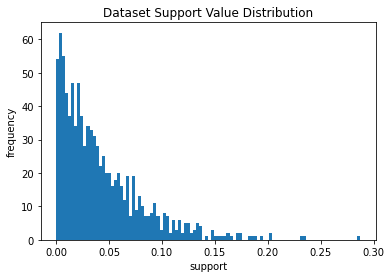

In [49]:
values = value_counts.values()

# plot value data distribution at each element
# plt.barh(values, np.arange(len(values)))
# plt.show()

# plot frequency of each values
plt.hist(values, bins=100)
plt.title('Dataset Support Value Distribution')
plt.xlabel("support")
plt.ylabel("frequency")
plt.show()

In [57]:
# ASSUME: appropriate min-support is the 0.5 percentile
min_support = np.percentile(list(values),50)
display("Min_support is:", min_support)

'Min_support is:'

0.031075

## M02
In this step, you will generate association rules from your ready-to-go-dataset.<br><br>
a. Again, choose the library you will use for generating association rules, mention what the algorithm is, and explain the reason/s why you choose it<br>
b. Using the library that you've chosen in (M02.a), generate association rules from the pre-processed dataset in M01.<br>
c. Print the association rule that you've found in M02.b along with their support and confidence scores.<br>
d. What is/are your conclusion/s from the association rules you obtain?

Your answer (M02.a):

### A. Algorithms for Frequent Pattern Mining
There are several prevalent algorithms for frequent itemset mining:
#### 1. Apriori
The first algorithm for fp mining. Designed for horizontal layout db based on breadth first search and join + prune method.
#### 2. Eclat
A vertical db layout algorithm based on depth first search.
#### 3. FP Growth
A tree based algorithm with divide and conquer method to mind fp in database. It constructs the conditional frequent pattern tree which satisfy the minimum support.

#### Comparison Conclusion:
Apriori has a major weakness of producing large number of candidate itemsets and database scans which equals to maximum length of frequent itemset. (Goswami  D.N et. al., 2010)

This poses a scalability problem when the database is large. This is because Apriori lacks efficient processing method on database. (SathishKumar et al., 2010)  

FP Growth is the most scalable out of all three. FP Growth also gives better performance compared to Eclat, although Eclat has a special knack of its ability to process vertical datasets.

#### Algorithm to choose:
Based by performance analysis above, it would be wise to pick FP Growth. However, I also wanted to see just how much better FP Growth is compared to Apriori. Thus, I will be conducting experiment on both Apriori and FP Growth algorithm.


### B. Choosing Libraries

From the experiment below, I've fiddled with two libraries that provide basic Apriori implementation:

#### 1. apyori
API:
apriori(transactions,
        min_support:float,
        min_confidence:float,
        min_lift:float,
        max_length:int)
Return datatype: RelationRecord

#### 2. mlxtend
API:
apriori(
    df: pandas DataFrame,
    min_support: float,
    use_colnames: bool,
    max_len: int,
    verbose: int,
    low_memory: bool
)

Return datatype: pandas DataFrame

#### Comparison
- From the API provided, apyori offers a more selective and specific pre-run constraints as parameters where as mlxtend only provides min_support constraint. This makes apyori the better library if we want to propose a strict selective constraints pre-run for our results. This turns into a huge deal when the dataset is large and the computing power is limited (which happens in this experiment). However, mlxtend provides special "low_memory" feature that helps in cases where the dataset is large and memory resources are limited.

- Judging by the returned results from both API, mlxtend has an edge over apyori with pandas DataFrame because of its extensive and convenient filtering features compared to RelationRecord. Furthermore, pandas DataFrame format is easier to discern and to understand by humans (this is subjective though). However, because apyori API already provides a more specific constraint with its parameters, we may not need the benefits of pandas DataFrames as much.

- mlxtend proposes a specific pandas DataFrame format for its input. The official guide recommends using mlxtend.preprocessing module's TransactionEncoder to convert raw input into one-hot encoded pandas DataFrame. This pre-processing overhead could be considered as negative in some cases.

- mlxtend has a complete, very helpful, official guide available online. Apyori, although widely used, does not have the same extensiveness in its documentation (the only which I could find is not official).

- According to my own experiment, apyori produces result faster compared to mlxtend (not benchmarked rigorously, please take with a grain of salt)

#### Conclusion
- For Apriori: I decided to use apyori for its light pre-processing needs, faster operation, and its readily available filtering parameters. mlxtend biggest downfall is its lack of pre-run min-confidence, min-length, and min-lift constraint, causing the algorithm to run in an inexorably long time or causing memory issues.

- For FP-Growth: I decided to go with mlxtend this time because pre-run constraint parameters are not that big of a deal with FP-Growth algorithm, which is magnitudes faster than Apriori. Also, based on my research, there are not that many FP-Growth libraries out there, most that I find is either old and unmantained (strictly based on python2 and do not support python3) or with questionably lesser quality in documentation compared to mlxtend.

#### Apriori with apyori

In [58]:
#put your code here for M02.b
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

association_rules = apriori(item_belanja, min_support=min_support, min_confidence=0.3, min_lift=2, min_length=2)
apyori_association_rules = list(association_rules)

#### Apriori with mlxtend

In [59]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

In [56]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.12494,(110),1
1,0.10284,(112),1
2,0.10377,(115),1
3,0.13204,(12),1
4,0.13343,(120),1
...,...,...,...
137,0.08343,(967),1
138,0.11264,(982),1
139,0.07998,(984),1
140,0.08579,(989),1


In [57]:
frequent_itemsets[ (frequent_itemsets['length'] > 1)]

,support,itemsets,length


Apriori with mlxtend does not provide parameters to constraint min-confidence, lift, and length. Thus, my machine is only able to run the algorithm in reasonable time when min-support parameter is 0.1, which does not produce any good ruleset at all.

#### FP-Growth with mlxtend

Generate Frequent itemsets

In [60]:
from mlxtend.frequent_patterns import fpgrowth

fp_growth_result = fpgrowth(df, min_support=min_support, use_colnames=True)

It is possible to run FP-Growth algorithm with a very low min-support in reasonable time because FP-growth doesn't require creating candidate sets explicitly.

Generate Association Rule

In [61]:
from mlxtend.frequent_patterns import association_rules

fp_growth_association_rules = association_rules(fp_growth_result, metric="confidence", min_threshold=0.3)
display(fp_growth_association_rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(489),(368),0.18921,0.28738,0.06120,0.323450,1.125514,0.006825,1.053315
1,(682),(368),0.17427,0.28738,0.06130,0.351753,1.224000,0.011218,1.099303
2,(692),(368),0.17203,0.28738,0.05867,0.341045,1.186739,0.009232,1.081440
3,(692),(529),0.17203,0.23384,0.05409,0.314422,1.344603,0.013863,1.117539
4,(450),(368),0.13324,0.28738,0.04655,0.349370,1.215706,0.008259,1.095276
...,...,...,...,...,...,...,...,...,...
62,(25),(510),0.08856,0.20125,0.03119,0.352191,1.750015,0.013367,1.233002
63,(25),(368),0.08856,0.28738,0.03113,0.351513,1.223165,0.005680,1.098897
64,(427),(529),0.10480,0.23384,0.03637,0.347042,1.484100,0.011864,1.173368
65,(661),(368),0.09059,0.28738,0.03118,0.344188,1.197676,0.005146,1.086623


Filter the Association Rule

In [62]:
fp_growth_association_rules = fp_growth_association_rules[( fp_growth_association_rules['lift'] >= 2 )]

#### Print Result

Result from apriori with apyori

In [63]:
#put your code here for M02.c
print("Association rules number: ", len(apyori_association_rules))
display(apyori_association_rules)

Association rules number:  2


[RelationRecord(items=frozenset({'205', '509'}), support=0.03544, ordered_statistics=[OrderedStatistic(items_base=frozenset({'509'}), items_add=frozenset({'205'}), confidence=0.3913427561837456, lift=2.3521021528052986)]),
 RelationRecord(items=frozenset({'510', '581'}), support=0.03352, ordered_statistics=[OrderedStatistic(items_base=frozenset({'581'}), items_add=frozenset({'510'}), confidence=0.4295783672946303, lift=2.1345508933894672)])]

Result from fp_growth with mlxtend

In [64]:
display(fp_growth_association_rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(581),(510),0.07803,0.20125,0.03352,0.429578,2.134551,0.017816,1.400280
25,(509),(205),0.09056,0.16638,0.03544,0.391343,2.352102,0.020373,1.369605


Your conclusion (M02.d):

### My conclusion:
Brief explanation on constraints that I propose for the association rules:
- I proposed a minimum confidence threshold of 0.3, this means that I only want association rules with a minimum 0.3 probability guarantee that if I see the antecendent, I will also see the consequent product being bought too. I picked 0.3 because 30% probability is, in my humble opinon, a nice estimate to judge if two products could be associated together as a combo.
- I proposed a minimum lift of 2, because a lift lesser than 2 or nearing 1 means that there are no association between the antecendent and consequent. I don't want independent cases showing up in the rules.
- I proposed a minimum support threshold by the 50% percentile of support distribution. It is a fairly high threshold, but I thought normally, we would only be interested in products with significant support values (popular products).

- There are lots of items that has an association with each other in this dataset.

Reading the data:
- Apriori with apyori produces the same result with fp_growth with mlxtend
- {205, 509} and {581,510} itemsets are a very popular combination, boasting support value higher than 50% percentile (0.031075) of the whole support value distribution.
- There is an approx, 43% chance that item 510 is also bought when item 581 is bought.
- There is an approx, 39% chance that item 205 is also bought when item 509 is bought.
- People buy item 581 and 510 together 2.13 times more likely than just buying item 510.
- People buy item 509 and 205 together 2.35 times more likely than just buying item 205.
- Both leverage values are not 0, so they are not independent but dependent with each other.
- Both convition are not 1, so they are not independent with each other. Higher conviction means consequent items are more dependent to the antecendent items. Item 510 depends more on 581 for its sale compared to how much item 205 depends on 509, although the difference is not that significant.

Therefore, the logical step to take as a shop business owner would be:
- Group item 510 with 581 together and item 509 and 205 together in a bundle purchase/package.
- Create a promotion campaign that offers discount or other benefits for buying item 510 alongside item 581 